# Orders

In [2]:
%%sql
SELECT COUNT(*) FROM [datalab-projects-1331:xjk_algo_comp_test.orders]

f0_
1110625


In [17]:
%%sql --module orders_by_date
SELECT date, COUNT(*) AS num_orders FROM [datalab-projects-1331:xjk_algo_comp_test.orders]
GROUP BY date
ORDER BY date

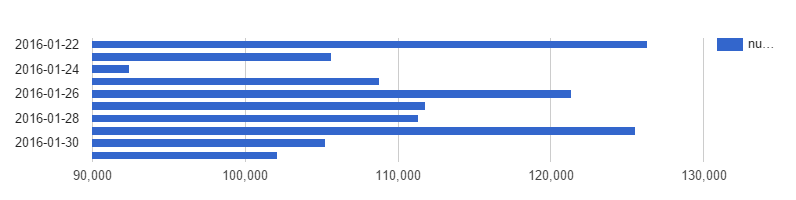

In [18]:
%%chart bars --data orders_by_date

In [1]:
%%sql
SELECT COUNT(*) FROM [datalab-projects-1331:xjk_algo_comp.orders]

f0_
8540614
